In [134]:
#Ensure that Pandas is installed
!pip install pandas openpyxl

In [135]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
# Load in the data (.csv file)
df = pd.read_csv('HR Employee Attrition Data.csv')

In [137]:
#Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [138]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [139]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [140]:
#Check for missing values
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [141]:
#Check for duplicated rows of data and retun a sum of duplicate rows
df.duplicated().sum()

0

In [142]:
#Check for inconsistancies in data entry
for col in df.columns:
    print(f"Number of unique values in '{col}': {df[col].nunique()}")


Number of unique values in 'Age': 43
Number of unique values in 'Attrition': 2
Number of unique values in 'BusinessTravel': 3
Number of unique values in 'DailyRate': 886
Number of unique values in 'Department': 3
Number of unique values in 'DistanceFromHome': 29
Number of unique values in 'Education': 5
Number of unique values in 'EducationField': 6
Number of unique values in 'EmployeeCount': 1
Number of unique values in 'EmployeeNumber': 1470
Number of unique values in 'EnvironmentSatisfaction': 4
Number of unique values in 'Gender': 2
Number of unique values in 'HourlyRate': 71
Number of unique values in 'JobInvolvement': 4
Number of unique values in 'JobLevel': 5
Number of unique values in 'JobRole': 9
Number of unique values in 'JobSatisfaction': 4
Number of unique values in 'MaritalStatus': 3
Number of unique values in 'MonthlyIncome': 1349
Number of unique values in 'MonthlyRate': 1427
Number of unique values in 'NumCompaniesWorked': 10
Number of unique values in 'Over18': 1
Numb

In [143]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in column 'Age':
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
----------------------------------------
Unique values in column 'Attrition':
['Yes' 'No']
----------------------------------------
Unique values in column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Unique values in column 'DailyRate':
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  

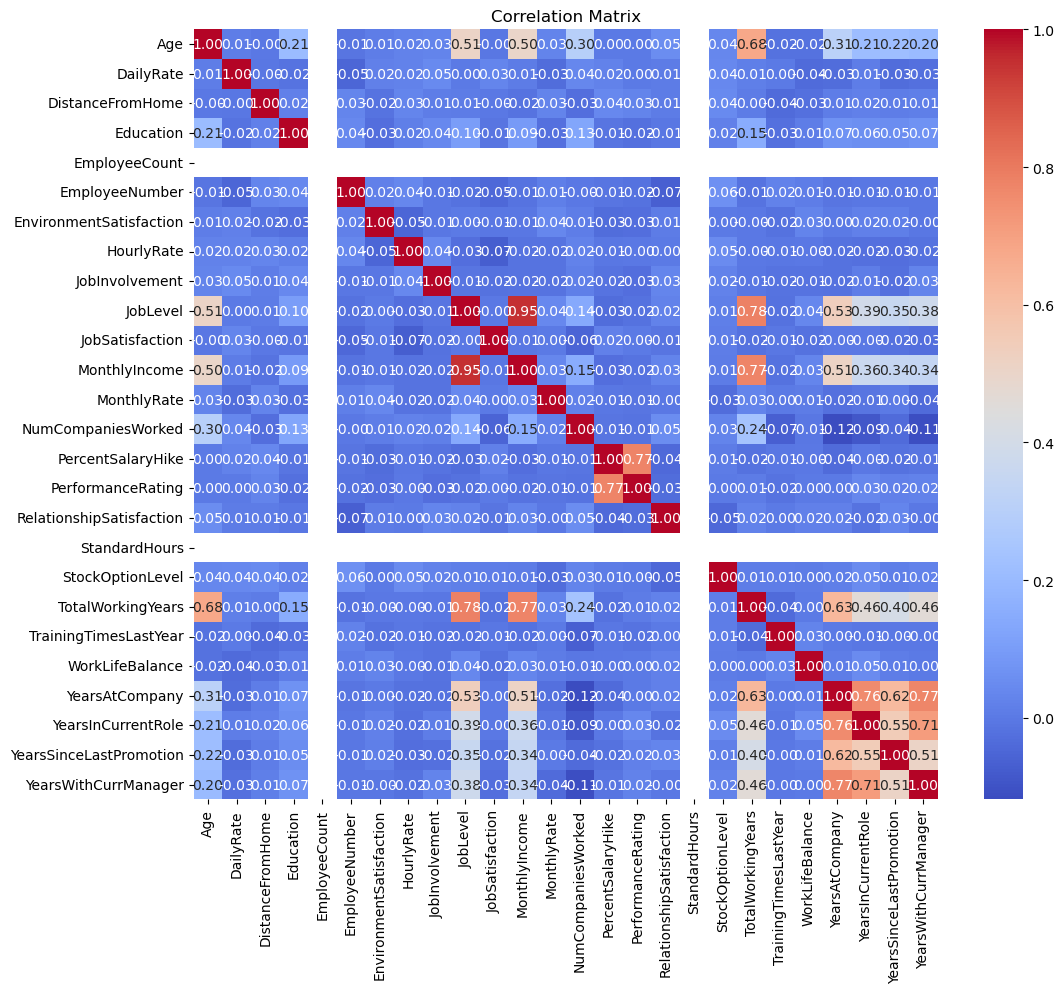

In [144]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical columns
corr = numeric_df.corr()

# Plot the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


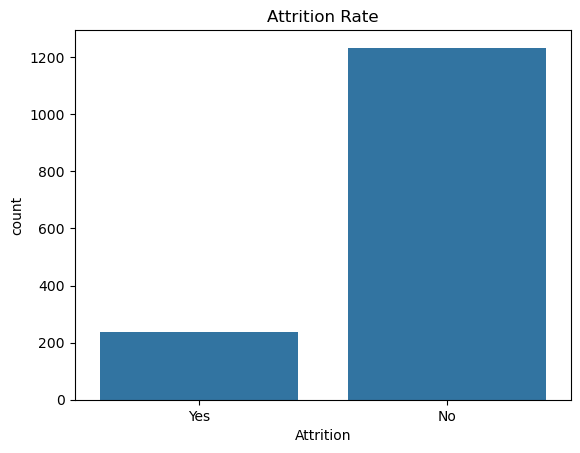

In [145]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Rate')
plt.show()


In [146]:
# Calculate the total number of employees and the number of employees who left
total_employees = len(df)
attrition_count = df[df['Attrition'] == 'Yes'].shape[0]

# Calculate the attrition rate
attrition_rate = attrition_count / total_employees * 100

print(f"Attrition Rate: {attrition_rate:.2f}%")


Attrition Rate: 16.12%


In [147]:
# Calculate attrition rate by job role
attrition_by_role = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_by_role['Attrition Rate (%)'] = attrition_by_role['Yes'] * 100

# Round the attrition rate to the nearest integer (double digit, no decimal)
attrition_by_role['Attrition Rate (%)'] = attrition_by_role['Attrition Rate (%)'].round(0).astype(int)

# Display the attrition rates by job role
print(attrition_by_role[['Attrition Rate (%)']])

Attrition                  Attrition Rate (%)
JobRole                                      
Healthcare Representative                   7
Human Resources                            23
Laboratory Technician                      24
Manager                                     5
Manufacturing Director                      7
Research Director                           2
Research Scientist                         16
Sales Executive                            17
Sales Representative                       40


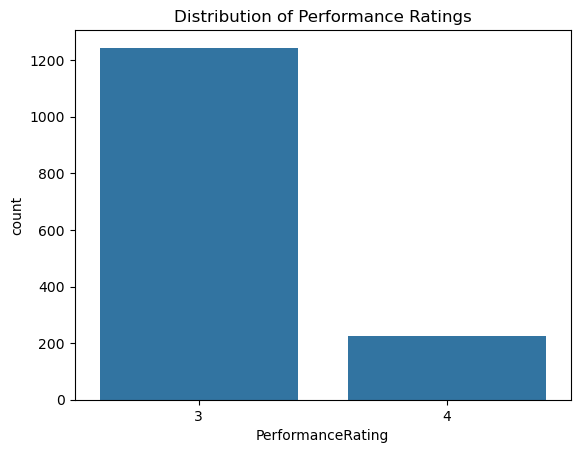

In [148]:
# Plot the distribution of performance ratings
sns.countplot(x='PerformanceRating', data=df)
plt.title("Distribution of Performance Ratings")
plt.show()


In [149]:
# Ensure the 'Attrition_binary' column exists
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the first few rows to verify the column exists
print(df[['Attrition', 'Attrition_binary']].head())


  Attrition  Attrition_binary
0       Yes                 1
1        No                 0
2       Yes                 1
3        No                 0
4        No                 0


In [150]:
# Calculate the correlation between performance and attrition
performance_attrition_corr = df[['PerformanceRating', 'Attrition_binary']].groupby('PerformanceRating').mean()

# Multiply by 100 to convert the result to percentage
performance_attrition_corr['Attrition Rate (%)'] = performance_attrition_corr['Attrition_binary'] * 100

# Round the attrition rate to 2 decimal places
performance_attrition_corr['Attrition Rate (%)'] = performance_attrition_corr['Attrition Rate (%)'].round(2)

# Display the results
print(performance_attrition_corr[['Attrition Rate (%)']])


                   Attrition Rate (%)
PerformanceRating                    
3                               16.08
4                               16.37


In [151]:
# Drop unnecessary columns (adjust based on your dataset)
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the transformed data
df_encoded.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [152]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Attrition_binary'])
y = df_encoded['Attrition_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [175]:
# Predict the test data
y_pred = model.predict(X_test)

# Display the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[250   5]
 [ 15  24]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       255
           1       0.83      0.62      0.71        39

    accuracy                           0.93       294
   macro avg       0.89      0.80      0.83       294
weighted avg       0.93      0.93      0.93       294



In [ ]:
#HR Analytics Report on Employee Attrition and Performance
#Executive Summary:

#In this report, we present a comprehensive analysis of employee attrition within our organization, using data on employee performance ratings, attrition patterns, and predictive modeling results to forecast future employee departures. The insights gained from this analysis are intended to support HR decision-making, focusing on understanding attrition trends and implementing strategies to enhance retention.

#1. Attrition Rate Overview:
#The current Attrition Rate within the organization stands at 16.12%. This percentage represents the proportion of employees who have left the company over a given time period, providing insight into overall turnover levels. According to Monster, the average UK attrition rate (or staff turnover rate) is approximately 15%. However, this figure can vary significantly depending on factors such as industry, company size, and even regional differences. In comparison, our organization's attrition rate of 16.12% is slightly above the national average, which may suggest an area of focus for HR in reducing turnover.

#Attrition Rate by Performance Rating:

#Further breakdown of attrition rates by Performance Rating reveals the following patterns:

#Performance Rating 3: Attrition Rate of 16.08%
#Performance Rating 4: Attrition Rate of 16.37%
#These figures show that the attrition rate is fairly consistent across different performance levels, with a small increase in attrition for employees with a higher performance rating of 4. This insight indicates that factors other than performance, such as job satisfaction, company culture, and employee engagement, might be contributing to the overall attrition rates.

#2. Predictive Modeling of Employee Attrition:
#In an effort to better predict which employees are most at risk of leaving, we developed a Predictive Attrition Model using logistic regression. This model was built to forecast employee turnover based on key attributes such as age, job role, distance from home, and more. The model's results provide valuable insights into how effectively we can predict employee departures, as well as areas for improvement.

#Confusion Matrix:

#The Confusion Matrix for the model's predictions is as follows:

#[[250   5]
# [ 15  24]]
#Breaking this down:

#250 employees were correctly predicted to stay (True Negatives).
#5 employees were incorrectly predicted to stay, when they actually left (False Positives).
#15 employees who actually left were incorrectly predicted to stay (False Negatives).
#24 employees who actually left were correctly predicted to leave (True Positives).
#While the model is successful at predicting employees who will stay, it struggles to predict those who will leave, as seen in the 15 false negatives. These missed predictions represent employees at risk of leaving that the model did not flag.

#Model Performance:

#The classification report provides a detailed assessment of the model's performance:

#Metric	Precision	Recall	F1-Score	Support
#Class 0 (Staying)	0.94	0.98	0.96	255
#Class 1 (Leaving)	0.83	0.62	0.71	39
#Overall Accuracy			0.93	294
#Macro Average	0.89	0.80	0.83	294
#Weighted Average	0.93	0.93	0.93	294
#Precision (Class 0, Staying): 94% – Out of all the employees predicted to stay, 94% of the predictions were correct.
#Recall (Class 0, Staying): 98% – 98% of employees who actually stayed were correctly identified by the model.
#Precision (Class 1, Leaving): 83% – Of the employees predicted to leave, 83% were correctly predicted.
#Recall (Class 1, Leaving): 62% – 62% of employees who actually left were correctly identified by the model. This relatively low recall suggests that the model is missing a significant portion of employees who are likely to leave.
#Model Performance Summary:

#Accuracy: The model has an overall accuracy of 93%, meaning it correctly predicted whether employees would stay or leave 93% of the time.
#Macro Average: The macro-average precision, recall, and F1-score (0.89, 0.80, and 0.83, respectively) indicate that, on average, the model is doing reasonably well, though there's room for improvement, particularly in predicting attrition (Class 1).
#Weighted Average: The weighted average metrics (0.93 for precision, recall, and F1-score) indicate that the model performs well when accounting for the class imbalance, where employees staying outnumber those leaving.
#3. Key Insights and Recommendations:
#Attrition Trends and Employee Performance: The relatively similar attrition rates across different performance levels (3 and 4) suggest that performance alone does not appear to be a significant predictor of employee turnover. This highlights the importance of exploring other factors such as work culture, management quality, career development opportunities, and job satisfaction as key contributors to employee decisions to leave. HR should further investigate these areas to understand what is driving turnover.
#Improving the Predictive Model for Attrition: Although the model achieves 93% accuracy, the relatively low recall for Class 1 (Employees Leaving) indicates that it misses a significant portion of employees who actually leave (38% of employees who left were not predicted). This can be improved by:
#Adjusting the Classification Threshold: We can tweak the decision threshold to increase recall, ensuring more employees at risk of leaving are identified.
#Applying Class Weights: By giving higher weight to the minority class (employees leaving), the model may become more sensitive to identifying employees who are likely to leave.
#Feature Engineering: Including additional features such as employee engagement scores, feedback from surveys, or compensation data could improve model accuracy.
#Retention Strategies: The analysis indicates that performance ratings do not significantly impact the likelihood of attrition. Therefore, HR should consider other interventions, such as:
#Employee Engagement: Focus on improving employee engagement through more meaningful feedback, recognition, and opportunities for growth.
#Career Development: Offer clear career progression and professional development programs to keep employees satisfied and reduce their intent to leave.
#Work-life Balance: Prioritize work-life balance initiatives, which could be a key factor influencing employee retention, especially for high-performing individuals who may feel burnout if expectations are too high.
#Actionable Steps Based on Model Output:
#Leverage the model to identify high-risk employees and develop targeted retention strategies, such as personalized development plans, mentoring, or compensation adjustments.
#Continuously monitor employee engagement levels and satisfaction scores to detect early signs of disengagement, especially for employees predicted to stay but potentially at risk.
#Explore exit interview data for common themes, especially for employees with lower performance ratings, to see if there are external factors contributing to their decision to leave.
#Conclusion:
#This analysis provides both a snapshot of current employee attrition and a predictive model for identifying potential future departures. While the organization's attrition rate of 16.12% is slightly above the UK average of 15%, the model provides an opportunity to intervene and reduce turnover. Focusing on improving the recall of employees who are likely to leave, as well as addressing factors such as employee engagement, work-life balance, and career development, will be key to reducing attrition and enhancing overall retention in the future.

#By leveraging these insights, HR can take a more proactive approach to reduce turnover, improve employee satisfaction, and foster a more engaged and committed workforce.